<a href="https://colab.research.google.com/github/danmcode/python_exercises/blob/main/tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 2:** PROBLEMAS DE CLASIFICACIÓN


*   Geyner Mauricio Rivera Jimenez
*   Camilo Andres Montes Fajardo
*   Daniel Alexander Muelas Rivera



# Usar el dataset del Iris para desarrollar los siguientes puntos:

**Explique detalladamente cómo funcionan la regularización L1 y L2, y cómo se implementan en sklearn.**

## Importar librerias.


In [30]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Importar el dataset de iris.
from statistics import mean
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

## Cargar la información

In [31]:
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

target = pd.DataFrame(data=iris.target, columns=['species'])
data = pd.concat([data, target], axis=1)

# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


ScatterPlots del dataset de iris

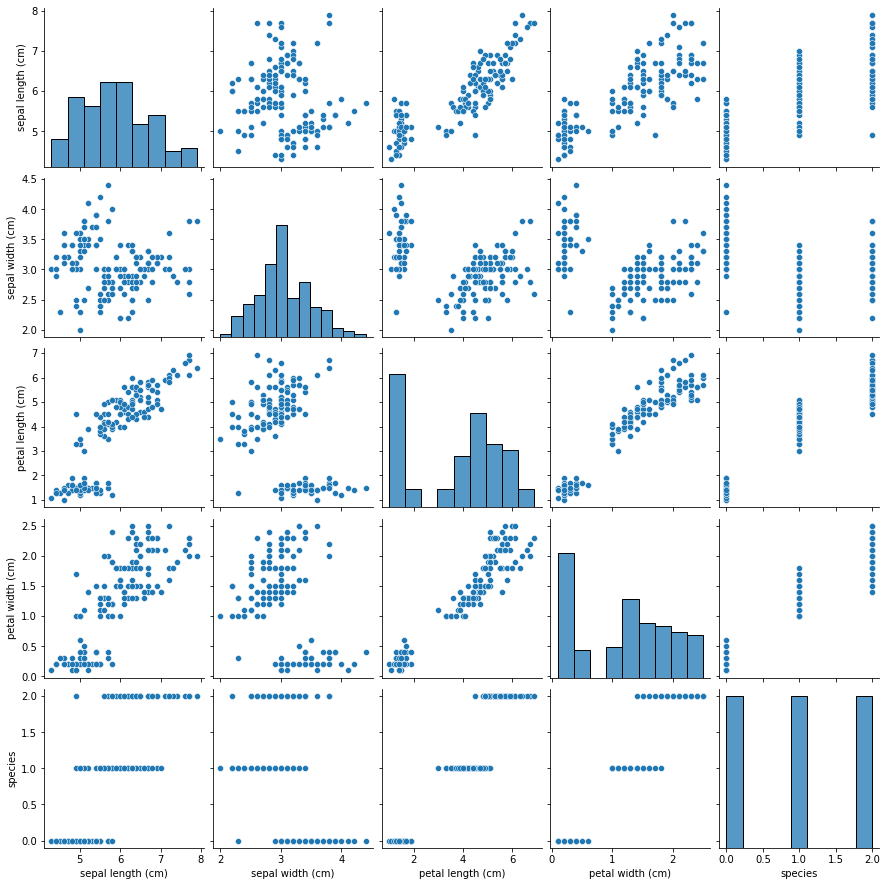

In [32]:
sns.pairplot(data)

Matriz de correlación

In [33]:
corr_mat = data.corr()
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


## Regresión Lineal


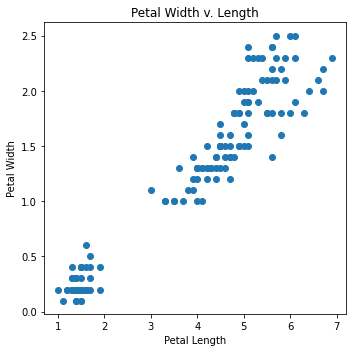

In [34]:
petal_length = data["petal length (cm)"]
petal_width = data["petal width (cm)"]

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(petal_length, petal_width)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

In [35]:
#Sepating the dependent and independent variables
y = data['species']
x = data.drop('species', axis=1)

#Data training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [36]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

lr_score = linear_model.score(x_test, y_test)
lr_score

0.9283039905426822

In [37]:
predict = linear_model.predict(x_test)
predict = predict.flatten()
predict[:10]

array([ 1.21694845, -0.02490031,  0.86882814,  1.34598839,  1.17107305,
        1.3460303 , -0.0220103 , -0.08416814,  0.01734902, -0.07387623])

In [38]:
rmse_linear = mean_squared_error(y_test, predict)
print(f"El meann squeare error de la regresión lineal es: { rmse_linear }") 

El meann squeare error de la regresión lineal es: 0.04672156848984487


## Regularización Ridge

**Reduce de forma proporcional el valor de todos los coeficientes del modelo sin dejar que estos lleguen a cero**

El grado de penalización esta controlado por el hiperparametro λ

y cuando λ = 0 es nula y el resultado es equivalente a OLS (*Ordinary Lesat Squares*)  Modelo lineal por minimos cuadrados. A medida que λ aumenta, mayor es la penalización y menor es el valor de los predictores.

$\sum_{i=1}^{n}(y_i - β_0 - \sum_{j=1}^{p} β_j x_{ij})^2 + λ\sum_{j=1}^{p}{β_j}^2$

In [39]:
modelRCV = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )
_ = modelRCV.fit(X = x_train, y = y_train)
# cross_val_scores_ridge = []
 
# # List to maintain the different values of alpha
alphas = modelRCV.alphas
coefs = []
# Loop to compute the different values of cross-validation scores
for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(x_train, y_train)
    coefs.append(ridge_model.coef_.flatten())

    # scores = cross_val_score(ridge_model, x, y, cv = 10)
    # avg_cross_val_score = mean(scores)*100
    
    # cross_val_scores_ridge.append(avg_cross_val_score)
 
# # Loop to print the different values of cross-validation scores
# for i in range(0, len(alpha)):
#     print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


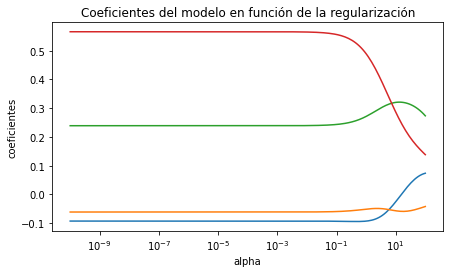

In [40]:
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [41]:
print(f"Mejor valor de alpha encontrado: {modelRCV.alpha_}")


Mejor valor de alpha encontrado: 0.013826221737646536


In [42]:
predicciones = modelRCV.predict(X=x_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 1.19827568, -0.03493411,  0.87316264,  1.34025194,  1.1643617 ,
        1.36534787, -0.02357266, -0.07357178,  0.01446333, -0.06297253])

In [43]:
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 0.21918592140840606


## Regularización lasso

**La regularización lasso tiene el efecto de forzar a que los coeficientes predictores tiendan a 0** debido a que un predictor con coeficiente cero no influye en el modelo.

El grado de penalización esta controlado por el hiperparametro λ

y cuando λ = 0 entonces el resultado es equivalente al de un modelo lineal por minimos cuadrados ordinarios.

$\sum_{i=1}^{n}(y_i - β_0 - \sum_{i=1}^{n} β_j x_{ij})^2 + λ\sum_{i=1}^{p}|β_i|$

In [44]:
modelLCV = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelLCV.fit(X = x_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [45]:
alphas = modelLCV.alphas_
coefs = []

for alpha in alphas:
    modelLCV_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelLCV_temp.fit(x_train, y_train)
    coefs.append(modelLCV_temp.coef_.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

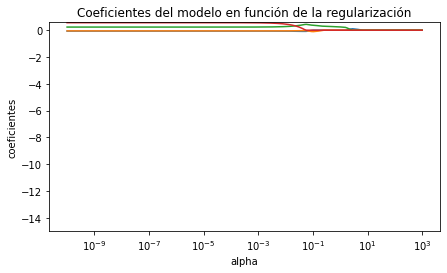

In [46]:
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

In [47]:
print(f"Mejor valor de alpha encontrado: {modelLCV.alpha_}")

Mejor valor de alpha encontrado: 0.0009771241535346503


In [48]:
predicciones = modelLCV.predict(X=x_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 1.16534049, -0.04700206,  0.86613551,  1.33177973,  1.15111568,
        1.38259518, -0.01309663, -0.05994665,  0.00160964, -0.06087017])

In [49]:
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 0.22153541517120778


## Resultados y conclusiones


La principal diferencia entre Lasso y Ridge:

Es que Lasso, hace que los coeficientes sean exactamente 0, por que realiza selección de los predictores. Mientras que Ridge no busca excluir ninguno.

Asi pues, Lasso supone ventaja en escenarios donde no todos los predictores son importantes para el modelo.

Por su parte, Ridge reduce la influencia de todos los predictores a la vez y de forma proporcional.

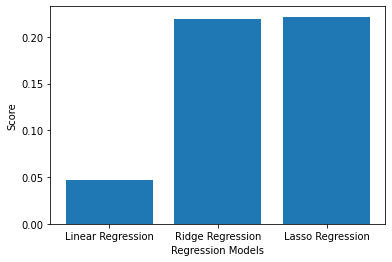

In [50]:
plt.bar(['Linear Regression', 'Ridge Regression', 'Lasso Regression'], 
        [rmse_linear, rmse_ridge, rmse_lasso])
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

# B. **Investigue acerca de la pérdida de entropía cruzada y cómo se implementa en la regresión logística. Realice el desarrollo matemático para encontrar la forma en que el gradiente descendente es aplicado en esta función de perdida.**


La función de pérdida de entropía cruzada es una función de optimización que se utiliza para entrenar modelos de clasificación que clasifican los datos prediciendo la probabilidad (valor entre 0 y 1) de si los datos pertenecen a una clase u otra.

la función de pérdida de entropía cruzada o pérdida de registro se utiliza como una función de costo para modelos de regresión logística

Necesitamos tener dos funciones, una como una función de costo (*función de entropía cruzada*) que se presenta a continuación:

$Cost(h_θ(x), y) =
\begin{cases}
- log(h_θ(x)) &,\, \text{if } y = 1 ,\\
- log(1 - h_θ(x) &,\, \text{if } y = 0
\end{cases} $

y la otra es una función de hipótesis que genera la probabilidad, que se usara la función sigmoide


**Funcion de hipotesis o funcion sigmoide**

In [51]:
def sigmoid(z): return 1.0 / (1.0 + np.exp(-z))

$ŷ: $ representa el valor predicho
valor de probabilidad calculado como salida de hipótesis función sigmoidea

$y: $ representa la caracteristica

In [52]:
def cross_entropy_loss(yHat, y):
    if y == 1:
      return -np.log(yHat)
    else:
      return -np.log(1 - yHat)

A continuación se crean los valores de muestra Z.

In [53]:
z = np.arange(-10, 10, 0.1)

h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)

cost_0 = cross_entropy_loss(h_z, 0)

Mostrar el grafico de perdida de enropia cruzada.

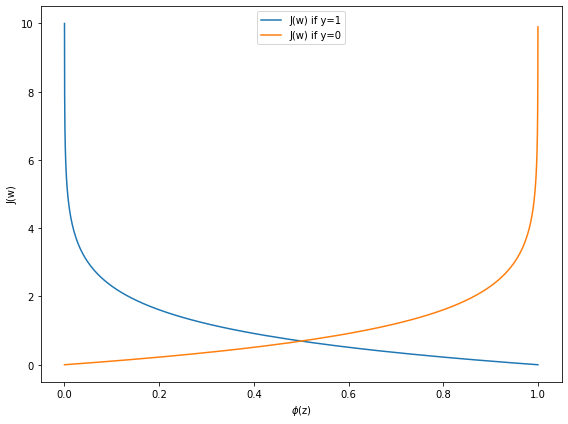

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Con base a la grafica anterior**

Para el valor real de la etiqueta como 1 (*línea azul*) si el valor de la hipótesis es 1, la salida de la función de pérdida o costo será cercana a cero. Sin embargo, cuando el valor de la hipótesis es cero, el costo será muy alto (casi infinito).

Para el valor real de la etiqueta como 0 (*línea naranja*), si el valor de la hipótesis es 1, la salida de la función de pérdida o costo será casi infinita. Sin embargo, cuando el valor de la hipótesis es cero, el costo será mucho menor (casi cero).


# C. **Explique cuáles son las opciones para la opción multi_clase (multi_class) enel clasificador de regresión logística, y cómo funcionan en sklearn.**

Como opciones para el multi_class del clasificador de regresión logística se tienen tres, las cuales son: ovr, multinomial y auto.
Ovr: con esta opción mas conocida como “one-vs-rest” lo que hará nuestro modelo es comparar una clase con todas las demás clases, luego realizará iterativamente este paso para todas las clases, logrando así transformar el problema multiclase en un problema multibinario.
Multinomial: al usar la regresión logística multinomial nuestro dataset debe de cumplir con el supuesto de separación no perfecta e independente de las variables predictivas, esta opción como tal se basa en la regresión lineal con la ecuación de la recta donde se tiene lo ya conocido que “y” es la variable de salida o resultado, “x” es una variable predictiva, “m” es la pendiente y “b” es donde se intercepta con el eje y. La ecuación logística también se transforma permitiendo la probabilidad de mas de dos categorías, Estas ecuaciones junto con la variable z se ven de la siguiente manera:

$ Pr( y = 1) = \frac{1}{z^{e^f(x)}} $

$ Pr( y = 2) = \frac{1}{z^{e^f(x)}} $

$ Pr( y = 3) = \frac{1}{z^{e^f(x)}} $

$ z = \sum_{k=1}^{k} ((e)^{f(x)})  $

Donde siempre tendremos a z como una constante, y solo se podrá determinar después de que se hayan calculado los coeficientes de regresión para las variables y las categorias de resultados.
Auto: este funciona muy parecido a la regresión logística multinomial ya que esta también contiene un parámetro C que se puede ajustar para encontrar el mejor ajuste excesivo o insuficiente


# D. **Explique el uso de solver='sag' en la regresión logística de sklearn.**

**SAG (Stochastic Average Gradient):** el método SAG optimiza la suma de un numero finito de funciones convexas suaves. Al igual que los métodos de gradientes estocásticos, el costo de cada iteración del método SAG es independiente del número de términos en la suma. Aun así, al incorporar una memoria de valores de gradientes anteriores, este método logra una tasa de convergencia más rápida que los métodos de gradiente estocástico de caja negra. Este solver es más rápido que otros métodos para grandes conjuntos de datos cuando tanto la cantidad de muestras como la cantidad de características son grandes. 
Las únicas desventajas es que solo admite la regresión Ridge y aunque este solver es adecuado para grandes datasets, con un costo de memoria de 0 puede ser menos practico para costos muy grandes ya que la evaluación del gradiente mas reciente para cada función debe mantenerse en la memoria.


# E. **Explique la clase SGDClassifier de sklearn**

**SGDClassifier** es considerado un clasificador lineal optimizado por SGD (Stochastic Gradiente Descent). Este clasificador usa como método de optimización al SGD, y funciona como una maquina de vectores de soporte lineal donde su algoritmo o modelo de aprendizaje es automático, este como tal define una función de perdida y el método de optimización la minimiza o maximiza.
Este clasificador permite el aprendizaje en línea o fuera del núcleo, por lo tanto, se suele usar para problemas a gran escala donde se logra desempeñar con muy buena eficiencia. Como el mínimo de la función de costo de la regresión logística no se puede calcular directamente, se intenta minimizar a través del SGD, en este proceso se desciende la función de costo hacia su mínimo en cada entrenamiento. Además, este clasificador puede seguir funcionando, aunque los registros en la memoria no se mantengan.


# F. **Explique tres formas diferentes de codificar datos categóricos, y cuáles son sus ventajas e inconvenientes.**

**Codificación entera:** en esta codificación a cada etiqueta única se le asigna a un entero y comúnmente se le suele llamar una codificación ordinal. Este tipo de codificación solo es apropiado si existe una relación conocida entre las categorías, cabe recalcar que esta relación solo existe para algunas de las variables en el dataset y no en todas y de manera ideal se deben de aprovechar para la preparación del dataset. Como tal para usarla en sklearn, se usa la función OrdinalEncoder () para codificar cada variable en enteros, esto es una clase flexible y permite especificar el orden de las categorías como argumentos si se conoce dicho orden.

**Codificación activa:** a diferencia de la anterior codificación, en esta a cada etiqueta se le asigna un vector binario y precisamente esta codificación es apropiada para aquellos datasets donde sus categorías no contengan ninguna relación entre ellas. Esto implica que toca representar cada variable categórica con un vector binario que tiene un elemento para cada etiqueta única, marcándola de manera binaria siempre y cuando solo contenga un 1 en el vector. Después de esto cada etiqueta en el dataset se reemplazara con el vector asignado y esto se realiza como tal en todas las variables categóricas del Deep learning, en sklearn se tiene la función OneHotEncoder () para codificar automáticamente las variables necesarias.

**Incrustación aprendida:** en esta codificación se aprende una representación distribuida de las categorías, aquí a cada categoría se le asigna a un vector distinto y las propiedades del vector se adaptan o aprenden mientras se está entrenando la red neuronal, dicho espacio vectorial proporciona una proyección de las categorías, lo que permite que las categorías relacionadas con el clúster se agrupen naturalmente. Esta proporciona beneficios de una codificación ordinal ya que las relaciones aprenden de los datos y a diferencia de una codificación activa, los vectores de entrada no contienen muchos ceros, pero como contraste se tiene que requiere un aprendizaje como parte del modelo y sumado a esto se tiene que crear muchas más variables de entrada.
